In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import os
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors=10)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load Train Data (a sample)

In [69]:
path ='../Kaggle_DSB_data/train.csv'
df = pd.read_csv(path, nrows=1000000, parse_dates=['timestamp'])

In [70]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


## 1. Net Game Times

In [71]:
net_game_time = df.groupby('installation_id')[['game_time']].sum()

In [72]:
print('pct of ids with zero game time: {:.2f}'.format(np.sum(net_game_time.game_time==0)/len(net_game_time)))

pct of ids with zero game time: 0.30


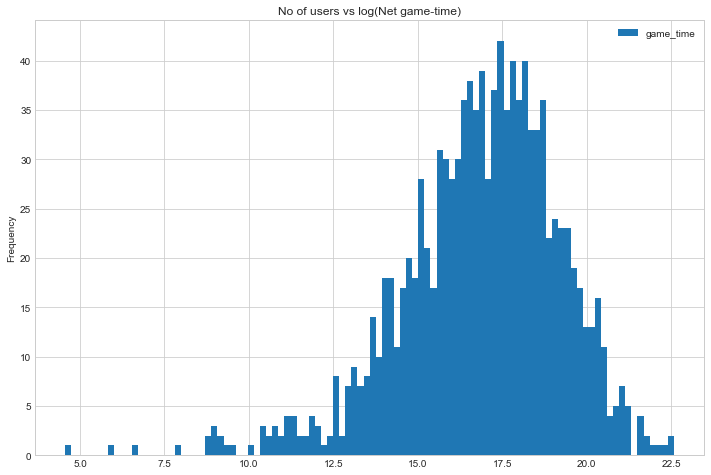

In [140]:
net_game_time[net_game_time.game_time>0]\
.apply(np.log)\
.plot(kind='hist', bins=100, figsize=(12,8), title="No of users vs log(Net game-time)")

## 2. Title Frequencies

In [74]:
title_counts = df['title'].value_counts().sort_values()

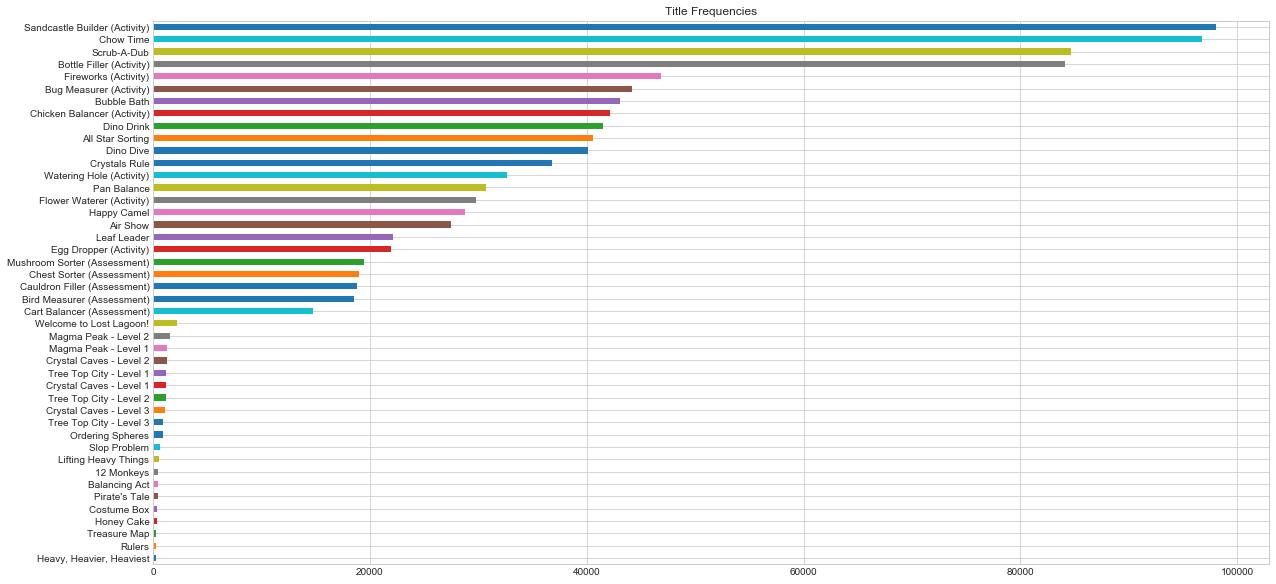

In [137]:
title_counts.plot(kind='barh',figsize=(20,10), title = "Title Frequencies")

# 3. Event_id's per user (counts)

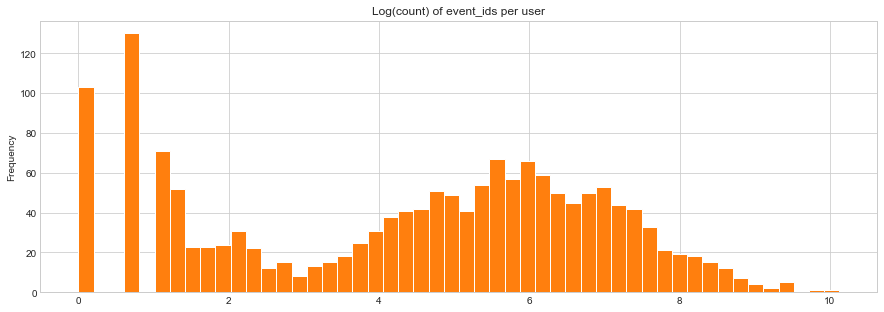

In [134]:
df.groupby('installation_id')['event_id']\
  .count()\
  .apply(np.log)\
  .plot(kind='hist' ,bins=50,edgecolor='white',
        figsize=(15,5),color=my_pal[1],
        title = "Log(count) of event_ids per user")


# Train Labels

In [141]:
path_labels ='../Kaggle_DSB_data/train_labels.csv'
train_labels = pd.read_csv(path_labels, nrows=1000000)

In [142]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


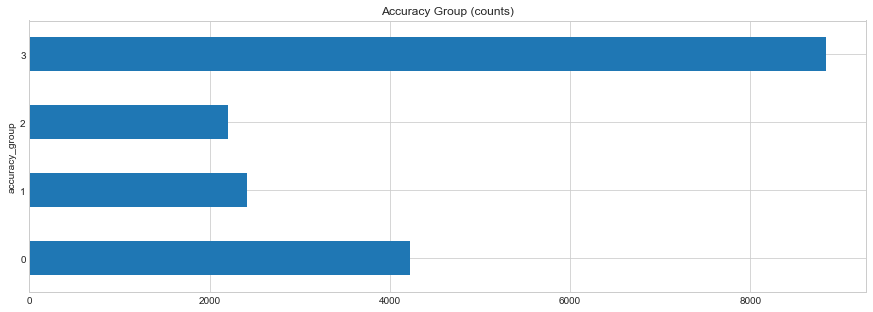

In [143]:
train_labels.groupby('accuracy_group')['game_session']\
            .count()\
            .plot(kind='barh', figsize=(15, 5), title='Accuracy Group (counts)', color=my_pal[0])